In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression #SKLEARN = Science Kit Learn
from sklearn.model_selection import train_test_split 

#imputer =SimpleImputer(strategy="median") #bütün sütunların medyanını bulup hepsini birden doldurur. 
#X = imputer.fit_transform(veri)

le = LabelEncoder()
r = RandomForestClassifier()
gbc = GradientBoostingClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()
xgbc = XGBClassifier()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",100)
import warnings
warnings.simplefilter('ignore') #uyarıları görmemek için.
import numpy as np

## İşletme Hedefi

Bir telekom şirketi, birden çok cihaz tarafından oluşturulan günlük dosyalarına dayalı olarak hizmet kesintilerini tahmin etmek için gelişmiş bir tahmin modeli geliştirmekle ilgileniyor.

Operasyon ekibine verilebilecek bir csv dosyası çıktılamalıyız, böylece fault_severity tahminine ve olasılığına dayalı olarak teknisyenlerin sevkıyatına öncelik verebilsinler.

### Neler yapmalıyım?
* Modülleri içeri aktar.
* Dataları içeri aktar.
* Verileri birleştir.
* Kategorik değişkenlerden metni kaldır.
* y= Hedef --->fault_severity
* df_train'i  "fault_severity" sütunu olmadan birleştir. 
* Dummy dönüşümü yap
* groupby ---> “id”
* Model seç (Gradient Boosting Classifier)
* train test

In [3]:
df_train = pd.read_csv("train.csv")
df_event = pd.read_csv("event_type.csv")
df_log =pd.read_csv("log_feature.csv")
df_resource = pd.read_csv("resource_type.csv")
df_severity = pd.read_csv("severity_type.csv")

In [4]:
df_train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [5]:
df_event.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [6]:
df_log.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [7]:
df_resource.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [8]:
df_severity.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


### MERGE

In [4]:
df1 = pd.merge(df_train,df_severity)

In [5]:
df2 = pd.merge(df1,df_resource)

In [6]:
df3 = pd.merge(df2,df_log)

In [7]:
df4 = pd.merge(df3,df_event)

In [8]:
df = df4

In [9]:
df.head()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34


In [9]:
df.shape

(61839, 8)

### Değişkenlerden metinleri kaldırma

In [10]:
df['event_type']=df['event_type'].str.replace(r'\D','')
df['resource_type']=df['resource_type'].str.replace(r'\D','')
df['severity_type']=df['severity_type'].str.replace(r'\D','')
df['log_feature']=df['log_feature'].str.replace(r'\D','')
df["location"] = df["location"].str.replace(r'\D','')

In [12]:
df.head() 

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,118,1,2,2,312,19,34
1,14121,118,1,2,2,312,19,35
2,14121,118,1,2,2,232,19,34
3,14121,118,1,2,2,232,19,35
4,9320,91,0,2,2,315,200,34


In [13]:
df.isnull().sum()

id                0
location          0
fault_severity    0
severity_type     0
resource_type     0
log_feature       0
volume            0
event_type        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   location        61839 non-null  object
 2   fault_severity  61839 non-null  int64 
 3   severity_type   61839 non-null  object
 4   resource_type   61839 non-null  object
 5   log_feature     61839 non-null  object
 6   volume          61839 non-null  int64 
 7   event_type      61839 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [11]:
df["location"] = df["location"].astype ("category")
df["event_type"] = df["event_type"].astype ("category")
df["resource_type"] = df["resource_type"].astype ("category")
df["severity_type"] = df["severity_type"].astype ("category")
df["log_feature"] = df["log_feature"].astype ("category")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              61839 non-null  int64   
 1   location        61839 non-null  category
 2   fault_severity  61839 non-null  int64   
 3   severity_type   61839 non-null  category
 4   resource_type   61839 non-null  category
 5   log_feature     61839 non-null  category
 6   volume          61839 non-null  int64   
 7   event_type      61839 non-null  category
dtypes: category(5), int64(3)
memory usage: 2.4 MB


In [21]:
df.head()

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,118,1,2,2,312,19,34
1,14121,118,1,2,2,312,19,35
2,14121,118,1,2,2,232,19,34
3,14121,118,1,2,2,232,19,35
4,9320,91,0,2,2,315,200,34


<AxesSubplot:xlabel='volume'>

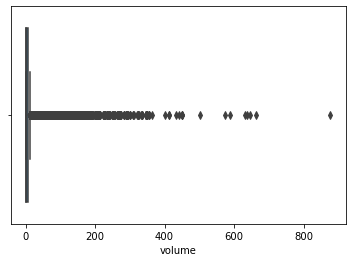

In [22]:
sns.boxplot(x = "volume", data = df)

In [12]:
df["volume"] = df[(df["volume"] > 0) & (df["volume"] < 2000)]

<AxesSubplot:xlabel='volume'>

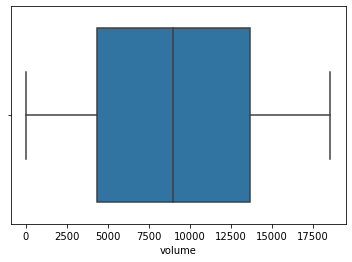

In [24]:
sns.boxplot(x = "volume", data = df)

## train_test

In [13]:
df.drop("fault_severity",axis = 1,inplace = True)

In [19]:
df.head()

,id,location,severity_type,resource_type,log_feature,volume,event_type
0,14121,118,2,2,312,14121,34
1,14121,118,2,2,312,14121,35
2,14121,118,2,2,232,14121,34
3,14121,118,2,2,232,14121,35
4,9320,91,2,2,315,9320,34


In [14]:
df = pd.get_dummies(df, drop_first = True)
#Dummy dönüşümü yapılır

In [15]:
df = df.groupby("id", as_index=False).mean()

In [22]:
df.head()

,id,location_10,location_100,location_1000,location_1002,location_1005,location_1006,location_1007,location_1008,location_1009,location_101,location_1010,location_1011,location_1013,location_1014,location_1015,location_1016,location_1017,location_1018,location_1019,location_102,location_1020,location_1021,location_1022,location_1023,location_1024,location_1025,location_1026,location_1027,location_1029,location_103,location_1030,location_1031,location_1032,location_1033,location_1034,location_1035,location_1036,location_1037,location_1038,location_104,location_1041,location_1042,location_1044,location_1045,location_1046,location_1047,location_1048,location_1049,location_1050,...,volume_18548,volume_18550,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,event_type_2,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_3,event_type_30,event_type_31,event_type_32,event_type_34,event_type_35,event_type_36,event_type_37,event_type_38,event_type_39,event_type_40,event_type_41,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_49,event_type_5,event_type_50,event_type_51,event_type_53,event_type_54,event_type_6,event_type_7,event_type_8,event_type_9
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.shape

(7381, 8700)

In [24]:
df.sample(5)

,id,location_10,location_100,location_1000,location_1002,location_1005,location_1006,location_1007,location_1008,location_1009,location_101,location_1010,location_1011,location_1013,location_1014,location_1015,location_1016,location_1017,location_1018,location_1019,location_102,location_1020,location_1021,location_1022,location_1023,location_1024,location_1025,location_1026,location_1027,location_1029,location_103,location_1030,location_1031,location_1032,location_1033,location_1034,location_1035,location_1036,location_1037,location_1038,location_104,location_1041,location_1042,location_1044,location_1045,location_1046,location_1047,location_1048,location_1049,location_1050,...,volume_18548,volume_18550,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,event_type_2,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_3,event_type_30,event_type_31,event_type_32,event_type_34,event_type_35,event_type_36,event_type_37,event_type_38,event_type_39,event_type_40,event_type_41,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_49,event_type_5,event_type_50,event_type_51,event_type_53,event_type_54,event_type_6,event_type_7,event_type_8,event_type_9
5694,14290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1295,3283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4115,10305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,2560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,3718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
x = df 

In [18]:
y = df_train[["id","fault_severity"]] 
#fault_severity'i sildiğimiz için tekrar asıl olduğu dosyadan almam gerekiyordu. 
#y = df[["fault_severity"]] yaptığımda hata verdi. 

In [19]:
y.head()

,id,fault_severity
0,14121,1
1,9320,0
2,14394,1
3,8218,1
4,14804,0


In [27]:
x.head()

,id,location_10,location_100,location_1000,location_1002,location_1005,location_1006,location_1007,location_1008,location_1009,location_101,location_1010,location_1011,location_1013,location_1014,location_1015,location_1016,location_1017,location_1018,location_1019,location_102,location_1020,location_1021,location_1022,location_1023,location_1024,location_1025,location_1026,location_1027,location_1029,location_103,location_1030,location_1031,location_1032,location_1033,location_1034,location_1035,location_1036,location_1037,location_1038,location_104,location_1041,location_1042,location_1044,location_1045,location_1046,location_1047,location_1048,location_1049,location_1050,...,volume_18548,volume_18550,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,event_type_2,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_3,event_type_30,event_type_31,event_type_32,event_type_34,event_type_35,event_type_36,event_type_37,event_type_38,event_type_39,event_type_40,event_type_41,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_49,event_type_5,event_type_50,event_type_51,event_type_53,event_type_54,event_type_6,event_type_7,event_type_8,event_type_9
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
x.shape , y.shape

((7381, 8700), (7381, 2))

In [21]:
df_train =df_train [["id","fault_severity"]]

In [22]:
df = pd.merge(df,df_train, on = "id")

In [23]:
df.head()

,id,location_10,location_100,location_1000,location_1002,location_1005,location_1006,location_1007,location_1008,location_1009,location_101,location_1010,location_1011,location_1013,location_1014,location_1015,location_1016,location_1017,location_1018,location_1019,location_102,location_1020,location_1021,location_1022,location_1023,location_1024,location_1025,location_1026,location_1027,location_1029,location_103,location_1030,location_1031,location_1032,location_1033,location_1034,location_1035,location_1036,location_1037,location_1038,location_104,location_1041,location_1042,location_1044,location_1045,location_1046,location_1047,location_1048,location_1049,location_1050,...,volume_18550,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,event_type_2,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_3,event_type_30,event_type_31,event_type_32,event_type_34,event_type_35,event_type_36,event_type_37,event_type_38,event_type_39,event_type_40,event_type_41,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_49,event_type_5,event_type_50,event_type_51,event_type_53,event_type_54,event_type_6,event_type_7,event_type_8,event_type_9,fault_severity
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
y = df["fault_severity"]

In [25]:
x = df.drop(["fault_severity","id"], axis = 1)

In [50]:
x.sample(5)

,location_10,location_100,location_1000,location_1002,location_1005,location_1006,location_1007,location_1008,location_1009,location_101,location_1010,location_1011,location_1013,location_1014,location_1015,location_1016,location_1017,location_1018,location_1019,location_102,location_1020,location_1021,location_1022,location_1023,location_1024,location_1025,location_1026,location_1027,location_1029,location_103,location_1030,location_1031,location_1032,location_1033,location_1034,location_1035,location_1036,location_1037,location_1038,location_104,location_1041,location_1042,location_1044,location_1045,location_1046,location_1047,location_1048,location_1049,location_1050,location_1051,...,volume_18550,event_type_10,event_type_11,event_type_12,event_type_13,event_type_14,event_type_15,event_type_18,event_type_19,event_type_2,event_type_20,event_type_21,event_type_22,event_type_23,event_type_24,event_type_25,event_type_26,event_type_27,event_type_28,event_type_29,event_type_3,event_type_30,event_type_31,event_type_32,event_type_34,event_type_35,event_type_36,event_type_37,event_type_38,event_type_39,event_type_40,event_type_41,event_type_42,event_type_43,event_type_44,event_type_45,event_type_46,event_type_47,event_type_48,event_type_49,event_type_5,event_type_50,event_type_51,event_type_53,event_type_54,event_type_6,event_type_7,event_type_8,event_type_9,location
4376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118
4679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,744
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478
7207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155
6360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,242


In [26]:
x.shape, y.shape

((7381, 8699), (7381,))

In [27]:
algorithms=[log,gbc,r,d,xgbc]
names = ["Logistic", "GradientBoosting", "RandomForest", "Decision Tree", "XGBC"]

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=13)

In [29]:
def algo_test():
    
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(x_train, y_train)
    
    accuracy_train = []
    accuracy_test = []
    #precision = []
    #recall = []
    #f1 = []
    
    for i in range(len(algorithms)):
        
        accuracy_train.append(accuracy_score(y_train, algorithms[i].predict(x_train)))
        accuracy_test.append(accuracy_score(y_test, algorithms[i].predict(x_test)))
        #precision.append(precision_score(y, algorithms[i].predict(x)))
        #recall.append(recall_score(y, algorithms[i].predict(x)))
        #f1.append(f1_score(y, algorithms[i].predict(x)))
        
    metrics = pd.DataFrame(columns = ["Accuracy Train","Accuracy Test"], index = names)
    metrics["Accuracy Train"] = accuracy_train
    metrics["Accuracy Test"] = accuracy_test
    #metrics["Precision"] = precision
    #metrics["Recall"] = recall
    #metrics["F1"] = f1
    
    return metrics
        
    

In [30]:
algo_test()

[13:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Train,Accuracy Test
Logistic,0.941825,0.712893
GradientBoosting,0.753749,0.725894
RandomForest,1.000000,0.727519
Decision Tree,1.000000,0.720477
XGBC,0.801445,0.736728
